# Wine Quality
Here, I will apply different ML algorithms to predict quality of wine.

1) **Normal equation**

The prediction of wine quality by **normal equation** is a **linear regression** task. **Normal equation** is an analytical approach to Linear Regression with a Least Square Cost Function.
We can directly find out the value of θ without using Gradient Descent. Following this approach is an effective and time-saving option when are working with a dataset with small features.
(click on the link to find more <a href="https://www.geeksforgeeks.org/ml-normal-equation-in-linear-regression/"><code>link1</code></a> and <a href="http://mlwiki.org/index.php/Normal_Equation"><code>link2</code></a>

2) **Random forest classifier**

3) **Neural Network**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

How to get data online:
<details>
    The code snippet below is responsible for downloading the dataset for example when running via Google Colab. You can also directly download the file using the link if you work with a local setup (in that case, ignore the the block below with !wget)

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2022-03-25 20:30:51--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [application/x-httpd-php]
Saving to: ‘winequality-white.csv’

winequality-white.c 100%[===================>] 258.23K   368KB/s    in 0.7s    

2022-03-25 20:30:54 (368 KB/s) - ‘winequality-white.csv’ saved [264426/264426]



In [3]:
# load data from csv file and make a numpy array
data = np.genfromtxt('winequality-white.csv',delimiter=";",skip_header=1)

print("data:", data.shape)

# Prepare for proper training
np.random.shuffle(data) # randomly sort examples

data: (4898, 12)


In [4]:
# take the first 3000 examples for training
x_train = data[:3000,:11] # all features except last column
y_train = data[:3000,11]  # quality column

# and the remaining examples for testing
x_test = data[3000:,:11]
y_test = data[3000:,11]

print("First example:")
print("Features:", x_train[0]) # [0] refers to the first example
print("Quality:", y_train[0])

First example:
Features: [6.900e+00 5.600e-01 2.600e-01 1.090e+01 6.000e-02 5.500e+01 1.930e+02
 9.969e-01 3.210e+00 4.400e-01 9.400e+00]
Quality: 5.0


In [5]:
features = ["fixed acidity", "volatile acidity", "citric acid", 
            "residual sugar", "chlorides", "free sulfur dioxide", 
            "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

## Data visualization

First we want to understand the data better. 
* Plot (`plt.hist`) the distribution of each of the features for the training data.
* the 2D distribution (either `plt.scatter` or `plt.hist2d`) of each feature versus quality.
* Also calculate the correlation coefficient (`np.corrcoef`) for each feature with quality. Which feature by itself seems most predictive for the quality?


<details>
    <a href="https://realpython.com/python-enumerate/"><code>enumerate</code></a>

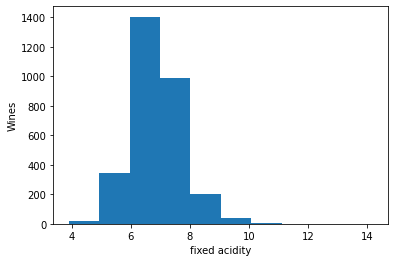

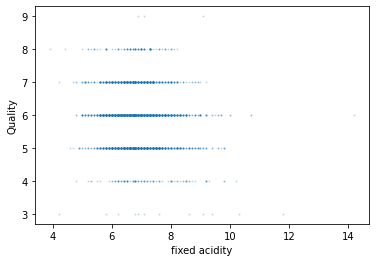

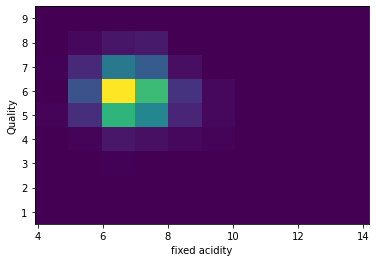

Feature: fixed acidity
Correlation coefficient: -0.103


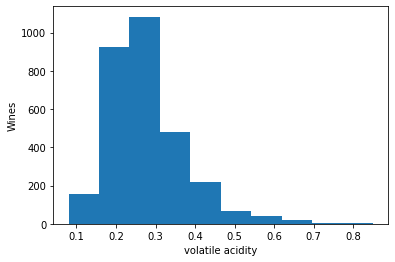

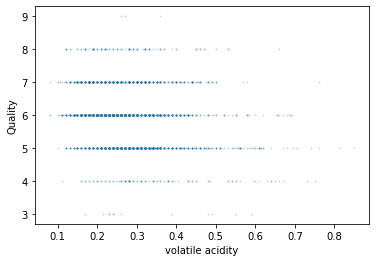

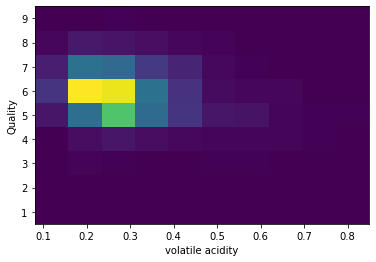

Feature: volatile acidity
Correlation coefficient: -0.180


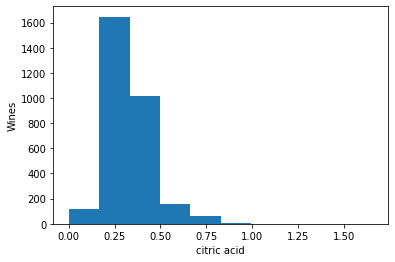

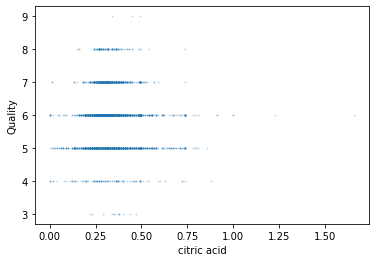

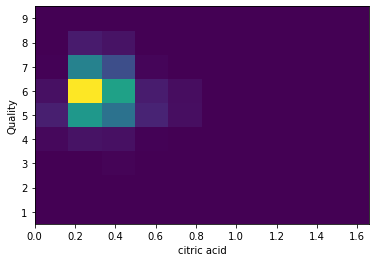

Feature: citric acid
Correlation coefficient: -0.022


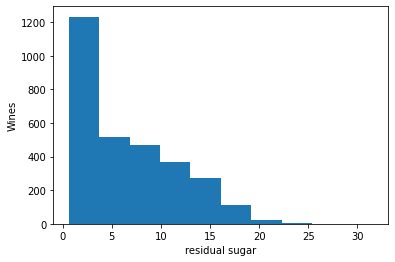

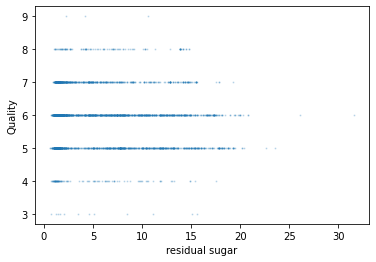

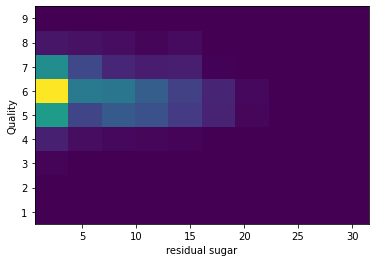

Feature: residual sugar
Correlation coefficient: -0.094


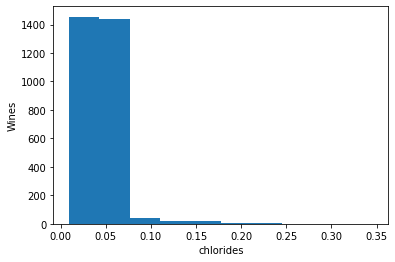

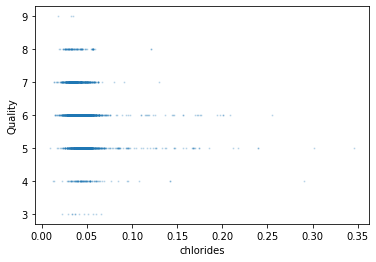

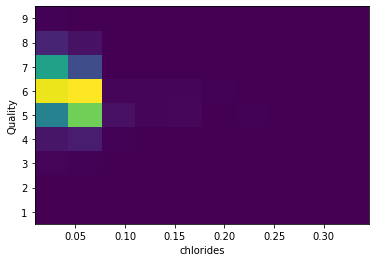

Feature: chlorides
Correlation coefficient: -0.203


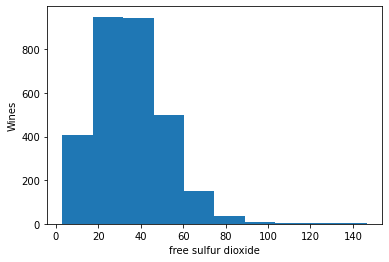

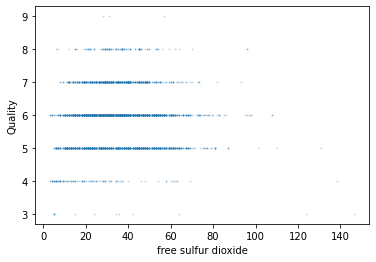

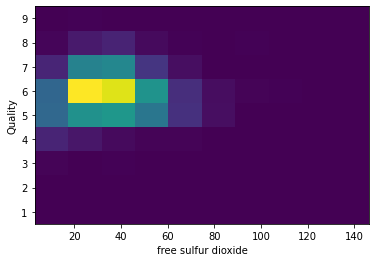

Feature: free sulfur dioxide
Correlation coefficient: 0.019


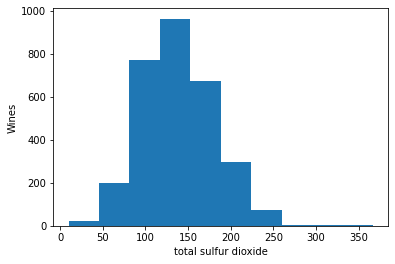

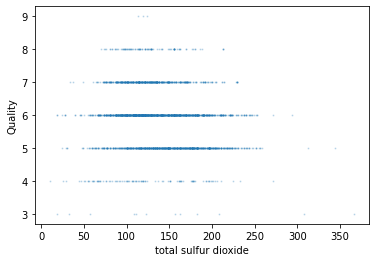

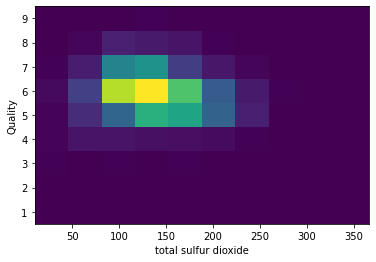

Feature: total sulfur dioxide
Correlation coefficient: -0.159


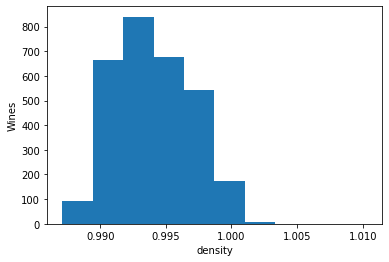

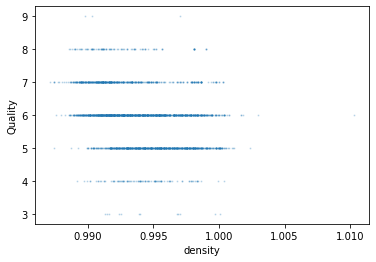

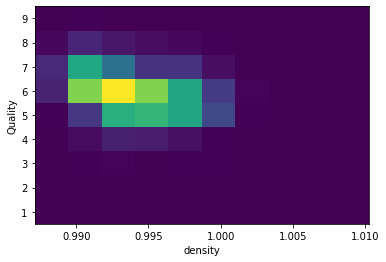

Feature: density
Correlation coefficient: -0.306


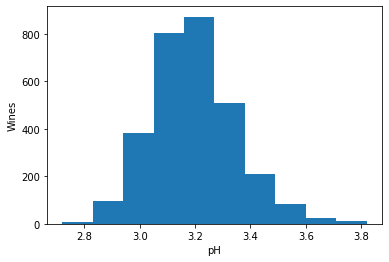

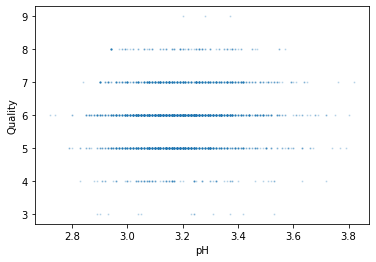

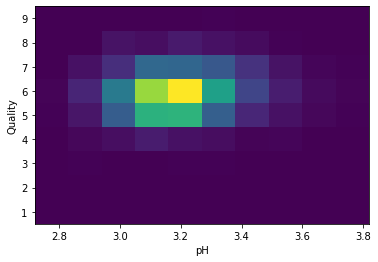

Feature: pH
Correlation coefficient: 0.089


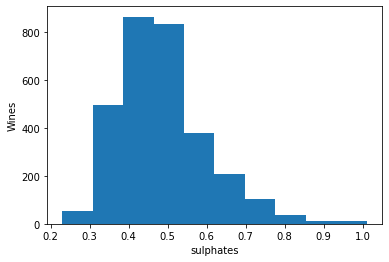

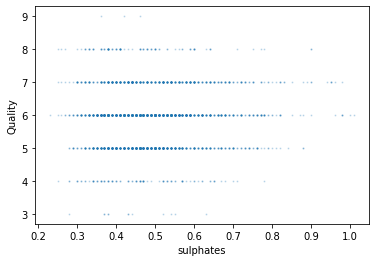

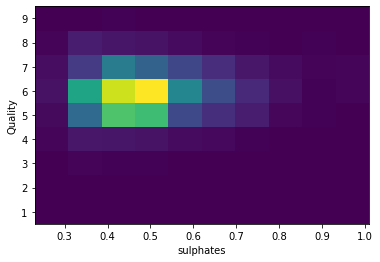

Feature: sulphates
Correlation coefficient: 0.058


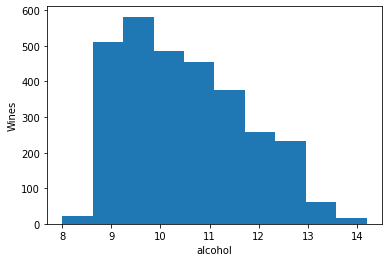

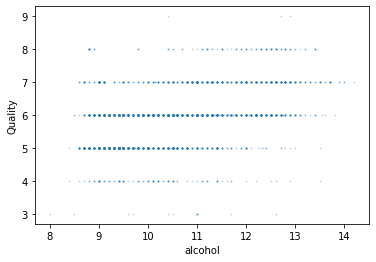

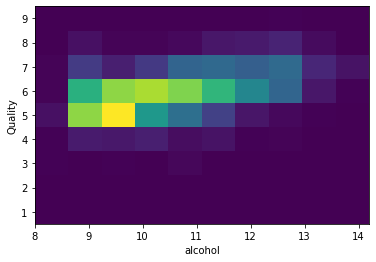

Feature: alcohol
Correlation coefficient: 0.432


<Figure size 432x288 with 0 Axes>

In [6]:
# Loop over all features
for element_index, element in enumerate(features):
    
    # 1D Histogram 
    plt.hist(x_train[:,element_index])
    plt.xlabel(element)
    plt.ylabel("Wines")
    plt.show()
    
    # Scatter plot 1 and 2 show same information in different representations.
    # Scatter Plot 1
    plt.scatter(x_train[:,element_index],y_train, s=1, alpha=0.2)
    plt.xlabel(element)
    plt.ylabel("Quality")
    plt.show()

    # Scatter Plot 2
    plt.hist2d(x_train[:,element_index],y_train, bins=[10, np.arange(0.5, 10.5, 1)])
    plt.xlabel(element)
    plt.ylabel("Quality")
    plt.show()
    
    # Calulate correlation coefficient
    plt.clf()
    print(f"Feature: {element}")
    print(f"Correlation coefficient: {np.corrcoef(x_train[:,element_index],y_train)[0,1]:.3f}") 


##  1) Normal equation

* Calculate the linear regression weights by solving the normal equation: 
     $$ W = (x^T x)^{-1} x^T y$$

<details>
    
    * Numpy provides functions for 
        * matrix multiplication (`np.matmul`), 
        * matrix transposition (`.T`),
        * matrix inversion (`np.linalg.inv`).


In [7]:
# Calulate weights using train data

w = np.matmul(np.matmul(np.linalg.inv(np.matmul(x_train.T, x_train)), x_train.T),y_train)

print(w)
print(w.shape)

[-4.43603981e-02 -1.84527919e+00 -1.45793952e-01  2.51287689e-02
 -8.13945826e-01  4.78552558e-03 -5.98154215e-04  2.19376614e+00
  9.44338291e-02  4.73716494e-01  3.64097369e-01]
(11,)


* Use the weights to predict the quality for the test dataset.
    * `y_{predict} = x_{test} w`

In [8]:
# Evaluate linear regression model 
y_pred = np.matmul(x_test,w)

print(x_test.shape,w.shape,y_pred.shape)
print(x_test[0])
print(y_pred[0])

(1898, 11) (11,) (1898,)
[5.9000e+00 2.9000e-01 3.3000e-01 7.4000e+00 3.7000e-02 5.8000e+01
 2.0500e+02 9.9495e-01 3.2600e+00 4.1000e-01 9.6000e+00]
5.6459068515509685


* To find how the predicted quality is good compared to the true quality of the test data, calculate the correlation coefficient between predicted and true quality and draw a scatter plot.

Correlation coefficient: 0.536229316181088


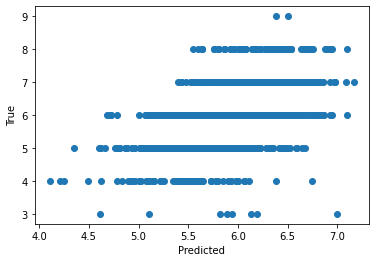

In [9]:
print("Correlation coefficient:", np.corrcoef(y_pred,y_test)[0,1])

# Prepare scatter plot
plt.scatter(y_pred,y_test)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## 2) Random Forest Classifier

In [10]:
# make pandas DataFrame of data
columns = ["fixed acidity", "volatile acidity", "citric acid", 
            "residual sugar", "chlorides", "free sulfur dioxide", 
            "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]
df = pd.DataFrame(data, columns=columns )
df.shape

(4898, 12)

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.9,0.56,0.26,10.9,0.060,55.0,193.0,0.99690,3.21,0.44,9.4,5.0
1,7.4,0.31,0.26,8.6,0.048,47.0,206.0,0.99640,3.26,0.36,9.1,5.0
2,7.0,0.19,0.33,6.3,0.032,42.0,127.0,0.99182,3.31,0.38,12.2,6.0
3,7.8,0.26,0.74,7.5,0.044,59.0,160.0,0.99600,3.22,0.64,10.0,6.0
4,6.0,0.19,0.37,9.7,0.032,17.0,50.0,0.99320,3.08,0.66,12.0,6.0


In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   float64
dtypes: float64(12)
memory usage: 459.3 KB


In [14]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Dataset does not have any null.

## Data visualization

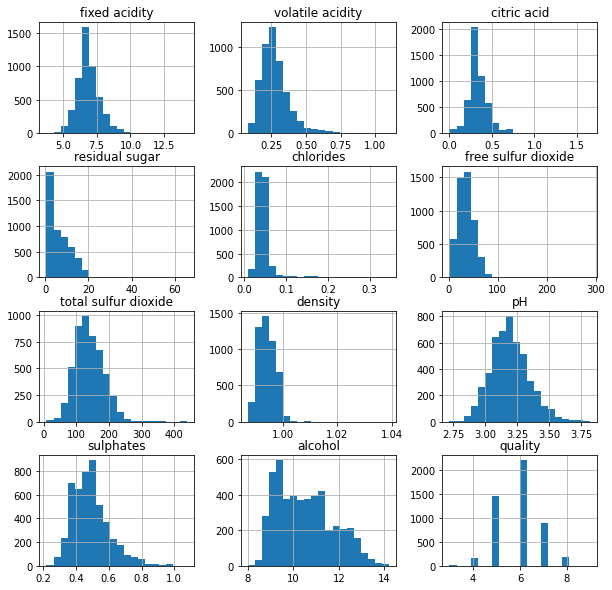

In [15]:
df.hist(bins=20,figsize=(10,10))
plt.show()

Let's check how the quality of wine change by alcohol.

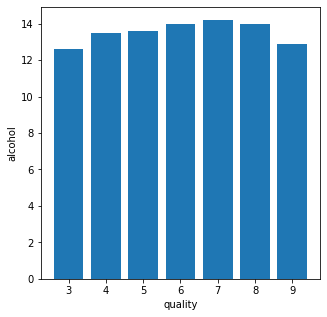

In [16]:
plt.figure(figsize=[5,5])
plt.bar(df['quality'],df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

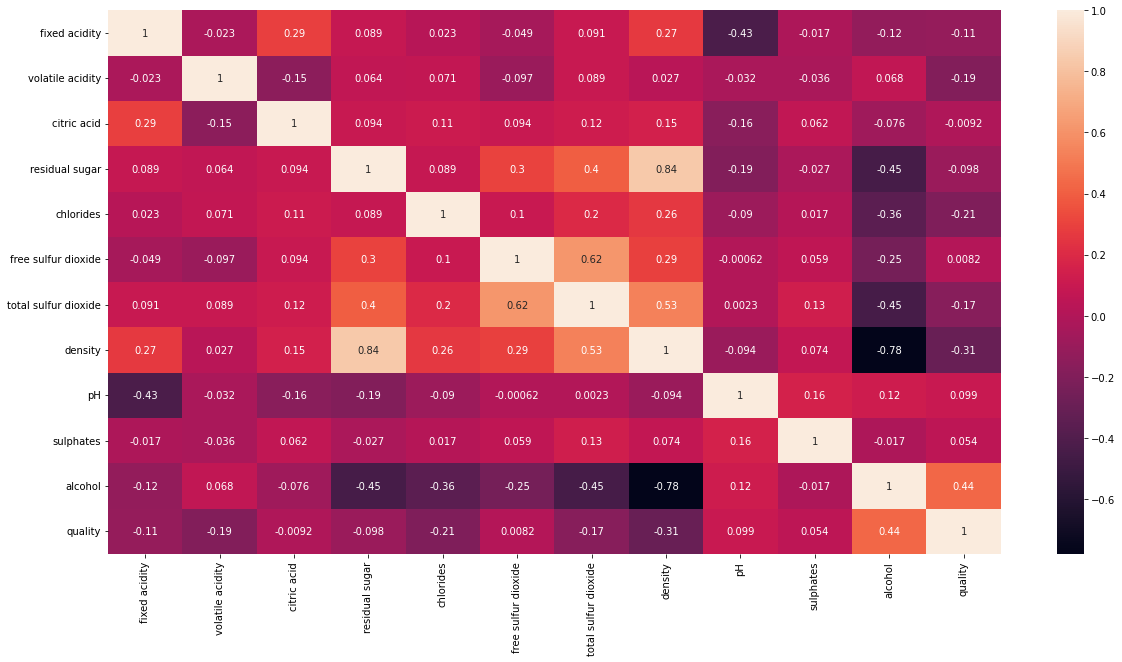

In [17]:
# correlation by visualization
plt.figure(figsize=[20,10])
# plot correlation
sb.heatmap(df.corr(),annot=True)
plt.show()

In [18]:
df.corr(method='pearson',min_periods=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [19]:
# features and target
X = df.drop(['quality'],axis=1)

Y = df['quality']
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.053583,2.795664,-0.613115,0.888997,0.651278,1.157980,1.285821,0.960550,0.143944,-0.436816,-0.905544
1,0.646153,0.315117,-0.613115,0.435486,0.101972,0.687541,1.591749,0.793360,0.475102,-1.137868,-1.149348
2,0.172097,-0.875545,-0.034638,-0.018025,-0.630437,0.393517,-0.267349,-0.738104,0.806260,-0.962605,1.369963
3,1.120209,-0.180992,3.353583,0.218589,-0.081131,1.393199,0.509236,0.659608,0.210175,1.315815,-0.417935
4,-1.013043,-0.875545,0.295920,0.652383,-0.630437,-1.076604,-2.079381,-0.276659,-0.717068,1.491078,1.207427
5,1.001695,-0.974766,-0.282557,-1.023637,0.010421,0.805151,1.427019,0.034315,-1.048226,-0.962605,-0.986812
6,-0.657501,0.612783,-0.447836,1.638277,0.056196,0.805151,1.403486,1.228055,0.276407,-0.261553,-0.824276
7,-0.420473,-0.677101,0.130641,-0.136332,-0.126906,0.687541,1.379953,-0.035905,0.342639,0.088973,-0.336667
8,0.883181,0.215896,-0.943673,0.750972,0.147747,1.275590,1.238756,0.860236,-0.717068,-0.787342,-0.986812
9,-0.064931,-0.677101,-0.199917,-0.688433,0.010421,0.275907,-0.408546,-0.911983,-0.783300,1.403446,0.313478


Split train set into random train and validation subsets.

In [21]:
from sklearn.model_selection import train_test_split
 
# creating train test splits
X_train, X_valid, Y_train, Y_valid = train_test_split(X_scaled, Y, train_size=0.7, test_size=0.3)

print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {X_valid.shape[0]}")

No. of training examples: 3428
No. of testing examples: 1470


In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [23]:
Y_pre = model.predict(X_valid)

Check the accuracy of the prediction

In [24]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(Y_valid,Y_pre)
RMSE = np.sqrt(MSE)

print('mean squared error is',MSE)
 
print('............................................')
 
print('root mean squared error is',RMSE)

mean squared error is 0.46530612244897956
............................................
root mean squared error is 0.6821335077893327


# 3) Neural network

The goal here is the implementation of a simple neural network with one hidden layer using **gradiant descent**.

Consider
* One hidden layer between input and outpu layers,
    * number of features: n_inputs
    * number of neurons in hidden layer: hidden_nodes
* Activation function,
    * reLu activation function

$$\hat{y}=\mathbf{W}^{\prime} \sigma(\mathbf{W} \vec{x}+\vec{b})+b^{\prime}$$

### Normalization:

<details>
    Before apply the neural network to get better results we normalize the input data.
    We apply normalization manually.

In [25]:
# mean value of each columns of data array by axis = 0
mean = np.mean(data, axis=0)
print(mean.shape)
# standard deviation of each columns of data array
std = np.std(data, axis = 0)

# Normalized data:
data = (data - mean)/std


# determine train and test sets:
X_train = data[:3000,:11]
y_train = data[:3000,11]

X_test = data[3000:,:11]
y_test = data[3000:,11]

print("First example:")
print("Features:", X_train[0])
print("Quality:", y_train[0])

(12,)
First example:
Features: [ 0.05358295  2.79566358 -0.6131152   0.88899726  0.6512778   1.15798004
  1.28582141  0.96055039  0.14394366 -0.43681578 -0.90554379]
Quality: -0.9913739176034738


### Random initialization of weights

<details>
    Initialise weights with suitable random distributions:

In [26]:
# number of nodes in the hidden layer
hidden_nodes = 50
# number of features
n_inputs = 11

# initialise
W = np.random.randn(hidden_nodes,11)*np.sqrt(2./n_inputs)
b = np.zeros(hidden_nodes)
Wp = np.random.randn(hidden_nodes)*np.sqrt(2./hidden_nodes)
bp = np.zeros(1)

print(W.shape)

(50, 11)


build a network
* activation function: reLu
we do not use written reLu function and write our own.
* 

### Activation function

In [27]:
def relu(x):
    return np.maximum(x,0)

In [28]:
def nn(x,W,b,Wp,bp):
    return np.dot(Wp,relu(np.dot(W,x)+b))+bp

Update weights using **gradiant descent**

For the **regression** problem the loss function is the **mean squared error** between the prediction and the true label $y$:
$$L=(\hat{y}-y)^{2}$$

Taking the partial derivatives - and diligently the applying chain rule - with respect to the different objects yields:

\begin{aligned}
\frac{\partial L}{\partial b^{\prime}} &=2(\hat{y}-y) \\
\frac{\partial L}{\partial \mathbf{W}_{k}^{\prime}} &=2(\hat{y}-y) \sigma\left(\sum_{i} \mathbf{W}_{i k} x_{i}+b_{k}\right) \\
\frac{\partial L}{\partial b_{k}} &=2(\hat{y}-y) \mathbf{W}_{k}^{\prime} \theta\left(\sum_{i} \mathbf{W}_{i k} x_{i}+b_{k}\right) \\
\frac{\partial L}{\partial \mathbf{W}_{k m}} &=2(\hat{y}-y) \mathbf{W}_{m}^{\prime} \theta\left(\sum_{i} \mathbf{W}_{i m} x_{i}+b_{m}\right) x_{k}
\end{aligned}

Here, $\Theta$ denotes the Heaviside step function.
Now, update the weights and bias via learning rate $\alpha$ by

\begin{aligned}
b^{\prime} &= b^{\prime} - \alpha \frac{\partial L}{\partial b^{\prime}} \\
\mathbf{W}_{k}^{\prime} &= \mathbf{W}_{k}^{\prime} - \alpha \frac{\partial L}{\partial \mathbf{W}_{k}^{\prime}} \\
b_{k} &= b_{k} - \alpha \frac{\partial L}{\partial b_{k}} & \\
\mathbf{W}_{k m} &= \mathbf{W}_{k m} - \alpha \frac{\partial L}{\partial \mathbf{W}_{k m}} &
\end{aligned}


<details>
    See the links
    <a href="https://www.tutorialspoint.com/python/python_basic_operators.htm"><code>python_basic_operators</code></a>
    and
    <a href="https://numpy.org/doc/stable/reference/generated/numpy.outer.html"><code>outer_product_of_two_vectors</code></a>


In [29]:
# learning rate
lr = 0.00005

def update_weights(x,y,W,b,Wp,bp):
    
    z = nn(x,W,b,Wp,bp)
    
    # Use the formulas derived to calculate the gradient for each of W,b,Wp,bp
    delta_bp = 2 * (z-y)
    delta_Wp = delta_bp * relu(np.dot(W,x)+b)
    delta_b = delta_bp * Wp * np.heaviside(np.dot(W,x)+b,0.5)
    delta_W = delta_bp * np.outer(Wp * np.heaviside(np.dot(W,x)+b,0.5),x)
    
    
    # Update the weights/bias following the rule
    bp -= lr * delta_bp
    Wp -= lr * delta_Wp
    b  -= lr * delta_b
    W  -= lr * delta_W
    
    # return new weights and bias
    return W, b, Wp, bp 

In [30]:
train_losses = []
test_losses = []

# How many epochs to train
n_epochs = 100

# Loop over the epochs
for ep in range(n_epochs):
        
    # Each epoch is a complete over the training data
    for i in range(X_train.shape[0]):
        
        # pick one example
        x = X_train[i]
        y = y_train[i]

        # use it to update the weights
        W, b, Wp, bp = update_weights(x,y, W, b, Wp, bp)
    
    # Calculate predictions for the full training and testing sample
    y_pred_train = [nn(x,W,b,Wp,bp)[0] for x in X_train]
    y_pred = [nn(x,W,b,Wp,bp)[0] for x in X_test]

    train_loss = sum((y_pred_train-y_train)**2) / y_train.shape[0]
    test_loss = sum((y_pred-y_test)**2) / y_test.shape[0] 
    
    # print some information
    print("Epoch:",ep, "Train Loss:", train_loss, "Test Loss:", test_loss)
    
    # store the losses for later use
    train_losses.append(train_loss)
    test_losses.append(test_loss)

Epoch: 0 Train Loss: 0.9335262536188299 Test Loss: 0.9554353919713549
Epoch: 1 Train Loss: 0.8220171221273876 Test Loss: 0.8451182560005069
Epoch: 2 Train Loss: 0.7761049489281161 Test Loss: 0.8014853933471069
Epoch: 3 Train Loss: 0.7521425827027876 Test Loss: 0.7800510138167487
Epoch: 4 Train Loss: 0.7368366047476212 Test Loss: 0.7670191527651823
Epoch: 5 Train Loss: 0.7255676396457169 Test Loss: 0.7576923615700348
Epoch: 6 Train Loss: 0.7165423863410251 Test Loss: 0.7503613571863988
Epoch: 7 Train Loss: 0.7089772304884597 Test Loss: 0.7442801678147333
Epoch: 8 Train Loss: 0.702432656236914 Test Loss: 0.7391002165925287
Epoch: 9 Train Loss: 0.6967056888910516 Test Loss: 0.7346392662578632
Epoch: 10 Train Loss: 0.6916448303572291 Test Loss: 0.7307605831442778
Epoch: 11 Train Loss: 0.6871537251923016 Test Loss: 0.7273707705341018
Epoch: 12 Train Loss: 0.6831457238550447 Test Loss: 0.7243971773428144
Epoch: 13 Train Loss: 0.6795288572099337 Test Loss: 0.7217574227277451
Epoch: 14 Train L

Best loss: 0.677, Final loss: 0.677
Correlation coefficient: 0.5862827118503674


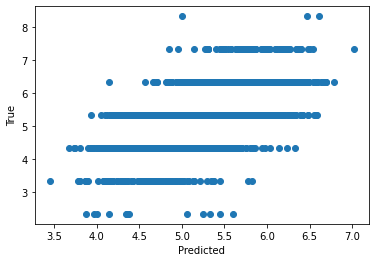

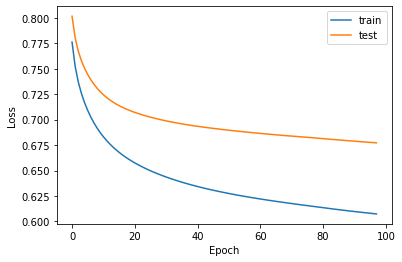

In [31]:
# After the training:
    
# Prepare scatter plot
y_pred = [nn(x,W,b,Wp,bp)[0] for x in X_test]

# now we need to rescale the output to the correct values
y_pred = (y_pred + mean[11])* std[11]
y_test = (y_test + mean[11])* std[11]
y_pred_train = (y_pred_train + mean[11]) * std[11]
y_train = (y_train + mean[11]) * std[11]


print(f"Best loss: {min(test_losses):.3f}, Final loss: {test_losses[-1]:.3f}")

print("Correlation coefficient:", np.corrcoef(y_pred,y_test)[0,1])
plt.scatter(y_pred_train,y_train)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Prepare and loss over time
plt.plot(train_losses[2:],label="train")
plt.plot(test_losses[2:],label="test") # we omit the first data points as the first loss is typically very high which makes it difficult to read the plot. 
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


# 4) Neural network by Keras

In [32]:
from tensorflow import keras
from tensorflow.keras import layers

In [41]:
data = np.genfromtxt('winequality-white.csv',delimiter=";",skip_header=1)

print("data:", data.shape)

np.random.shuffle(data)

# Normalize
mean = np.mean(data, axis=0)
std = np.std(data, axis = 0)
print(mean.shape)

data = (data - mean)/std

X_train = data[:3000,:11]
y_train = data[:3000,11] 

X_test = data[3000:,:11]
y_test = data[3000:,11]

print("First example:")
print("Features:", X_train.shape)
print("Quality:", y_train.shape)

data: (4898, 12)
(12,)
First example:
Features: (3000, 11)
Quality: (3000,)


In [34]:
hidden_nodes = 50
input = X_train.shape[(1)]

In [35]:
model = keras.Sequential([
                          layers.Dense(units=hidden_nodes, activation='relu', input_shape=[input]),
])

2022-03-25 20:31:26.041836: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [36]:
model.compile(
    optimizer="adam",
    loss="mae",
)

In [37]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=100,
)

Epoch 1/100
12/12 [==============================] - 0s 10ms/step - loss: 0.8353 - val_loss: 0.8260
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8217 - val_loss: 0.8139
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8093 - val_loss: 0.8030
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7982 - val_loss: 0.7930
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7879 - val_loss: 0.7842
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7789 - val_loss: 0.7762
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7707 - val_loss: 0.7691
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7635 - val_loss: 0.7627
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7571 - val_loss: 0.7572
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7516 - val_loss: 0.7524
Epoch 11

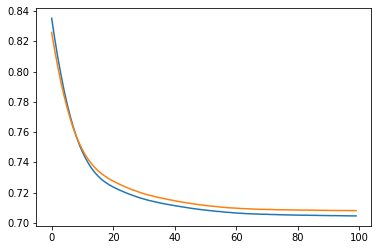

In [38]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();
history_df['val_loss'].plot();